# Support Vector Machine Regressor By Virat Tiwari

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Here we create a synthetic datapoints 

from sklearn.datasets import make_regression

In [5]:
x,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [6]:
x

array([[-0.66914703,  3.0028663 ],
       [ 0.73954957, -1.75204103],
       [ 0.87837178,  0.34802555],
       ...,
       [-0.09746097,  0.4957376 ],
       [-0.61953614, -1.16702595],
       [ 0.56275329,  0.86669696]])

In [7]:
y

array([ 1.43678955e+02, -5.68113204e+01,  9.12838634e+01, -1.70866224e+02,
        8.56806291e+01,  2.92337125e+01, -7.79724586e+01,  9.11117894e+01,
       -1.08354859e+02, -2.47335784e+01, -2.73606168e+01, -3.34045547e+00,
       -1.08011290e+02, -8.25625949e+01, -1.55043557e+01,  7.91575068e+01,
        4.02750471e+01, -1.95363742e+02,  3.68849567e+01, -1.85019235e+01,
       -8.44034078e+00, -4.23611451e+01,  2.48196958e+01, -7.68678968e+01,
       -1.70165361e+02, -1.27609860e+02,  2.50987094e+01,  9.50424045e+00,
        1.81897034e+02,  1.63687853e+02,  2.05445979e+02, -1.50404983e+02,
        3.24615233e+01,  2.23082221e-04,  8.86516366e+01,  1.32280109e+02,
        1.50697995e+02,  1.24233753e+02, -3.10727764e+01,  1.45561010e+02,
       -1.42687777e+02,  2.23215314e+02,  5.94918306e+01,  5.76835187e+00,
        5.26207034e+01, -9.99981882e+01,  1.05393325e+02, -8.98667668e+01,
       -6.85530360e+01, -8.42043026e+01, -1.27008469e+01,  7.25398339e+01,
        8.46885407e+01,  

In [8]:
pd.DataFrame(x)[0]

0     -0.669147
1      0.739550
2      0.878372
3     -1.052862
4      0.818460
         ...   
995    1.310300
996    1.679653
997   -0.097461
998   -0.619536
999    0.562753
Name: 0, Length: 1000, dtype: float64

<AxesSubplot: xlabel='0', ylabel='1'>

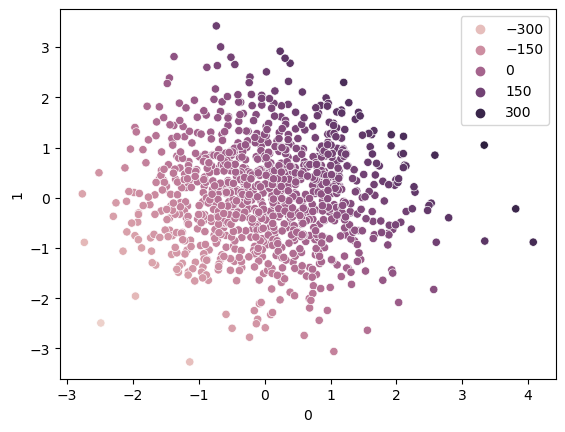

In [9]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [16]:
from sklearn.svm import SVR

In [17]:
svr=SVR(kernel="linear")

In [18]:
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [19]:
svr.coef_

array([[80.52081068, 63.99786342]])

In [20]:
# PREDICTION

y_pred=svr.predict(x_test)

In [21]:
y_pred

array([ -50.78619048, -100.6698624 ,   92.50960009,  -34.45637451,
         21.1000446 ,  123.89232675,  -67.67529172,  -25.48777031,
         -4.22080043,  -13.93971997,  -80.2433813 ,  -64.80842279,
        116.2969725 ,  150.93276492,   96.93600875,   39.32893397,
         -3.5266477 ,    8.94305831,  121.20919264,  -68.43323432,
         -7.61015799,    0.63041379, -109.39979939,  105.24955626,
       -218.97309857,   36.28819815,   29.60996178,   97.4984852 ,
        -41.83910034,   25.68822946,  -80.47886782,   80.11742408,
         45.02050451,  -28.15546008,  104.73493892,  148.14230072,
        -15.6411896 ,  -86.86601056,   51.8612737 ,   38.26112501,
        -15.58580636, -115.2045172 ,  -83.28980498,  -35.65509259,
        -22.0358118 ,  -62.76441074, -136.62772765,  164.77855472,
         75.69570666,   69.71209089,    6.270792  ,   94.46128682,
        103.93811024, -145.91498385, -124.97812434,  -37.06592351,
        175.05651671,  -50.14365953,  -42.17737627,   20.44695

In [22]:
from sklearn.metrics import r2_score

In [23]:
print(r2_score(y_test,y_pred))

0.998901182035587


# Hyperparameter Tuning With SVR

In [31]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [32]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [34]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.690 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.706 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.710 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.711 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.696 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.690 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.706 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.710 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.711 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.696 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [35]:
grid.best_params_

{'C': 1000, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [ ]:
# PREDICTION 

y_pred4=grid.predict()